In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
N = 100
tau = 0.1
incomes = np.random.pareto(2, (N))
w = np.ones(N)/N
w2 = incomes/incomes.sum()
contrib = tau * incomes

# Scenario: An ally country relatively close to up is in a war and requires assistance.
# How much money collected through taxes should we send to them, in the form of weapons, ammunition, and supplies?

v = np.random.normal(incomes.sum()/2, 0.2 * incomes.sum()/2, (N))

def cost(w, v, contrib):
    V = (v * w).sum() / w.sum()
    return (contrib*np.abs(v - V)).sum()


In [25]:
l1 = []
l2 = []

for i in range(1000):
    N = 100
    tau = 0.1
    incomes = np.random.pareto(2, (N))
    w = np.ones(N)/N
    w2 = incomes/incomes.sum()
    contrib = tau * incomes
    v = np.random.normal(incomes.sum()/2, 0.2 * incomes.sum()/2, (N))
    c1 = cost(w, v, contrib)
    c2 = cost(w2, v, contrib)
    l1.append(c1)
    l2.append(c2)

In [29]:
np.array(l1).mean() / np.array(l2).mean()

1.3317156721420682

In [35]:
income_propensity = np.random.pareto(2, (N))
g = np.random.normal(income_propensity, 0.1 * income_propensity)

In [78]:
# In democracy, 51 people will pillage the money of 49 people
# In a meritocracy, 80 people will pillage the money of 20 people

def find_winners_and_losers(w, weights=None):
    if weights is None:
        n = len(w)
        median = n // 2
        w = sorted(w)
        return w[:median + 1], w[median + 1:]
    else:
        sorted_w, sorted_weights = zip(*sorted(zip(w, weights)))
        s = 0
        for i in range(len(sorted_weights)):
            new_s = s + sorted_weights[i]
            if s < 0.5 and new_s > 0.5:
                break_index = i + 1
            s = new_s
        return list(sorted_w[:break_index]), list(sorted_w[break_index:])
    
def h(w_win, w_lose, w0):
    wealth_limit = w_win[-1]
    n_win = len(w_win)
    n_lose = len(w_lose)
    s_lose = sum(w_lose)  
    to_add = s_lose/n_win
    n_swing = sum([i == wealth_limit for i in w_win])
    n_swings_so_far = 0
    for i in range(len(w0)):
        if w0[i] < wealth_limit:
            w0[i] += to_add
        elif w0[i] > wealth_limit:
            w0[i] = 0
        else:
            n_swings_so_far += 1
            if n_swings_so_far > n_swing:
                w0[i] = 0
            else:
                w0[i] += to_add
    return w0, s_lose



def simulate_path(T: int = 10, N: int = 100, tau: float = 0.1):
    income_propensity = np.random.pareto(5, (N)) # Some people will get more money than others
    democratic_weights = np.ones(N)/N
    incomes = np.random.normal(income_propensity, 0.3 * income_propensity)
    for t in range(T):
        argsort_order = np.argsort(incomes)
        incomes = incomes[argsort_order]
        incomes = incomes + np.random.normal(income_propensity[argsort_order], 0.3 * income_propensity[argsort_order]) # Rich get richer
        contrib = tau * incomes # This includes labour tax, VAL tax, inheritance, housing, etc
        merit_weights = contrib/contrib.sum()
        # Find winners and losers
        w_win_demo, w_lose_demo = find_winners_and_losers(incomes, weights=None)
        # w_win_merito, w_lose_merito = find_winners_and_losers(incomes, weights=merit_weights)
        w, s_lose = h(w_win_demo, w_lose_demo, incomes)
        # w, s_lose = h(w_win_demo, w_lose_demo, incomes)
        print('w', w)

def save_results(T: int = 10, N: int = 100, tau: float = 0.1):
    income_propensity = np.random.pareto(5, (N)) # Some people will get more money than others
    democratic_weights = np.ones(N)/N
    incomes = np.random.normal(income_propensity, 0.3 * income_propensity)
    results = np.zeros(shape=(T, N), dtype=float)
    transfers = np.zeros(T)
    
    for t in range(T):
        argsort_order = np.argsort(incomes)
        incomes = incomes[argsort_order]
        incomes = incomes + np.random.normal(income_propensity[argsort_order], 0.3 * income_propensity[argsort_order]) # Rich get richer
        contrib = tau * incomes # This includes labour tax, VAL tax, inheritance, housing, etc
        merit_weights = contrib/contrib.sum()
        # Find winners and losers
        w_win_demo, w_lose_demo = find_winners_and_losers(incomes, weights=None)
        # w_win_merito, w_lose_merito = find_winners_and_losers(incomes, weights=merit_weights)
        w, s_lose = h(w_win_demo, w_lose_demo, incomes)
        results[t] = w
        transfers[t] = s_lose
    return results, transfers


r, t = save_results(200, 80)

In [77]:
def save_results(T: int = 10, N: int = 100, tau: float = 0.1):
    income_propensity = np.random.pareto(5, (N)) # Some people will get more money than others
    democratic_weights = np.ones(N)/N
    incomes = np.random.normal(income_propensity, 0.3 * income_propensity)
    results = np.zeros(shape=(T, N), dtype=float)
    transfers = np.zeros(T)
    
    for t in range(T):
        argsort_order = np.argsort(incomes)
        incomes = incomes[argsort_order]
        incomes = incomes + np.random.normal(income_propensity[argsort_order], 0.3 * income_propensity[argsort_order]) # Rich get richer
        contrib = tau * incomes # This includes labour tax, VAL tax, inheritance, housing, etc
        merit_weights = contrib/contrib.sum()
        # Find winners and losers
        w_win_demo, w_lose_demo = find_winners_and_losers(incomes, weights=None)
        # w_win_merito, w_lose_merito = find_winners_and_losers(incomes, weights=merit_weights)
        w, s_lose = h(w_win_demo, w_lose_demo, incomes)
        results[t] = w
        transfers[t] = s_lose
    return results, transfers

r2, t2 = save_results(200, 80)


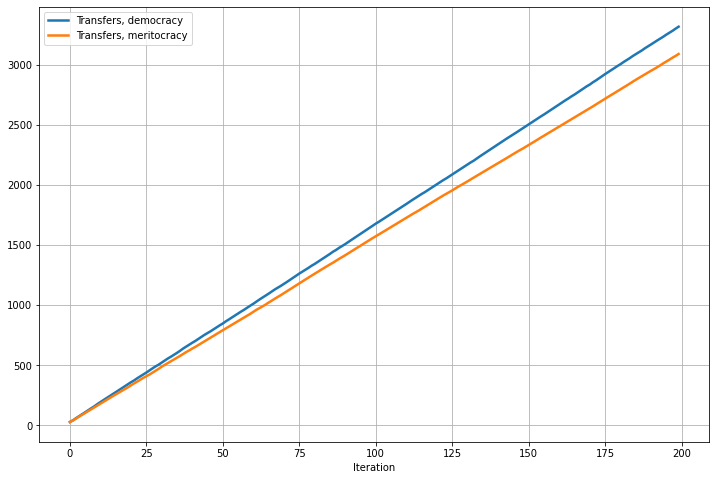

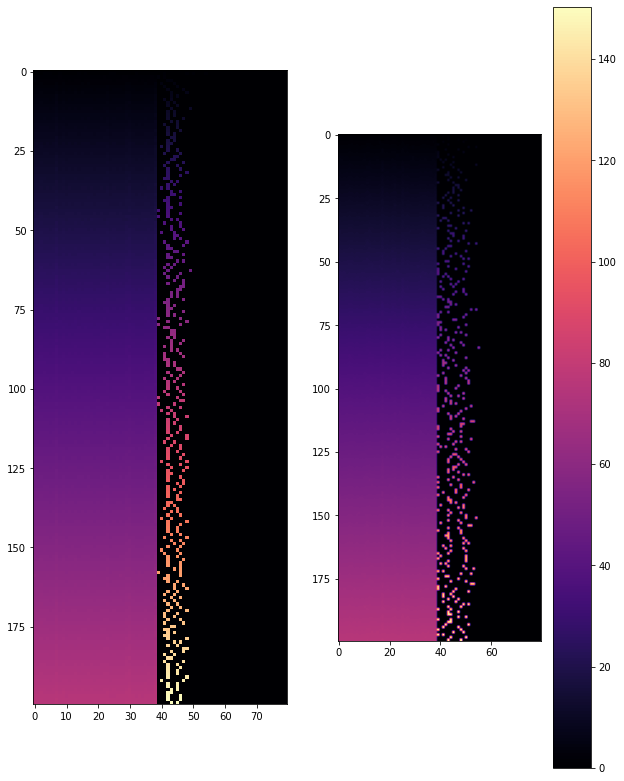

In [79]:
plt.figure(figsize=(12, 8), facecolor='white')
plt.plot(t, label='Transfers, democracy', linewidth=2.5)
plt.plot(t2, label='Transfers, meritocracy', linewidth=2.5)

plt.xlabel("Iteration")
plt.legend()
plt.grid(True)

plt.figure(figsize=(10, 20), facecolor='white')
plt.subplot(1, 2, 1)
plt.imshow(r, cmap='magma')
plt.subplot(1, 2, 2)
plt.imshow(r2, cmap='magma')
plt.colorbar()